**OBJECTIVE - CLASSIFICATION**
To develop a supervised machine learning model that can automatically classify customer reviews into sentiment categories using textual data and evaluate the effectiveness of different classification algorithms.

In [2]:
#import libraries
import pandas as pd
import nltk
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


In [3]:
df = pd.read_csv("master_dataset.csv")

#createing a field sentiment
def sentiment(score):
    if score <=2:
        return "Negative"
    elif score ==3:
        return "Neutral"
    else:
        return "Positive"
    
df['review_sentiment']=df['review_score'].apply(sentiment)

#creating df for nlp
nlp_df = df[["review_comment_message","review_sentiment"]].dropna()


In [4]:
nlp_df.head()

,review_comment_message,review_sentiment
0,"Não testei o produto ainda, mas ele veio corre...",Positive
1,"Não testei o produto ainda, mas ele veio corre...",Positive
2,"Não testei o produto ainda, mas ele veio corre...",Positive
3,Muito bom o produto.,Positive
5,O produto foi exatamente o que eu esperava e e...,Positive


In [5]:
nlp_df.shape

(50245, 2)

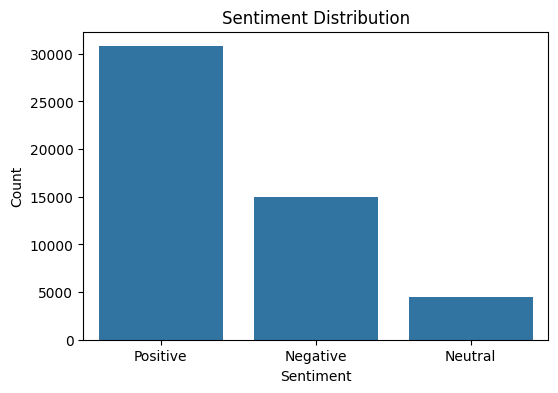

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x='review_sentiment', data=nlp_df)
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

In [8]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/ruchika-
[nltk_data]     kaur/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/ruchika-
[nltk_data]     kaur/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
stop_words = set(stopwords.words("portuguese"))

#function to clean
def clean_review_portuguese(review):
    
    # Lowercase
    review = review.lower()
    
    # Remove punctuation
    review = review.translate(str.maketrans('', '', string.punctuation))
    
    # Tokenize
    tokens = word_tokenize(review)
    
    # Remove Portuguese stopwords
    tokens = [word for word in tokens if word not in stop_words]
    
    return " ".join(tokens)
   

nlp_df["clean_text"] = nlp_df["review_comment_message"].apply(clean_review_portuguese)

In [10]:
nlp_df.head()

,review_comment_message,review_sentiment,clean_text
0,"Não testei o produto ainda, mas ele veio corre...",Positive,testei produto ainda veio correto boas condiçõ...
1,"Não testei o produto ainda, mas ele veio corre...",Positive,testei produto ainda veio correto boas condiçõ...
2,"Não testei o produto ainda, mas ele veio corre...",Positive,testei produto ainda veio correto boas condiçõ...
3,Muito bom o produto.,Positive,bom produto
5,O produto foi exatamente o que eu esperava e e...,Positive,produto exatamente esperava descrito site cheg...


In [11]:
#vectorization
tfidf = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1,2)  # bigrams improve sentiment detection
)

X_tfidf = tfidf.fit_transform(nlp_df["clean_text"])

In [12]:
y = nlp_df["review_sentiment"]

In [13]:
#split into train and test data
X_train,X_test,y_train,y_test = train_test_split(X_tfidf,y,test_size=0.2,random_state=42)

#predict
model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)
pred = model.predict(X_test)

#evaluate
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

    Negative       0.79      0.89      0.84      2992
     Neutral       0.58      0.13      0.21       906
    Positive       0.90      0.94      0.92      6151

    accuracy                           0.85     10049
   macro avg       0.76      0.66      0.66     10049
weighted avg       0.84      0.85      0.83     10049



Model performs very well for Positive reviews.
Good performance for Negative reviews.
Very poor performance for Neutral reviews.

Reason:
Class imbalance.
Neutral class is harder to detect.
Neutral reviews may share words with positive/negative.

In [14]:
import numpy as np

feature_names = tfidf.get_feature_names_out()
coefficients = model.coef_[0]

top_positive_indices = np.argsort(coefficients)[-10:]
top_negative_indices = np.argsort(coefficients)[:10]

print("Top Positive Words:")
print(feature_names[top_positive_indices])

print("\nTop Negative Words:")
print(feature_names[top_negative_indices])

Top Positive Words:
['enviaram' 'atrasada' 'cancelar' 'passou' 'dinheiro' 'resposta' 'consigo'
 'péssimo' 'comprei' 'péssima']

Top Negative Words:
['ótimo' 'rápido' 'perfeito' 'antes' 'rápida' 'excelente' 'ótima'
 'obrigada' 'tudo' 'lindo']


The NLP module successfully classifies customer sentiments using TF-IDF and Logistic Regression, achieving strong performance for positive and negative reviews. However, the model struggles with neutral sentiment detection, indicating scope for class balancing and advanced modeling improvements.